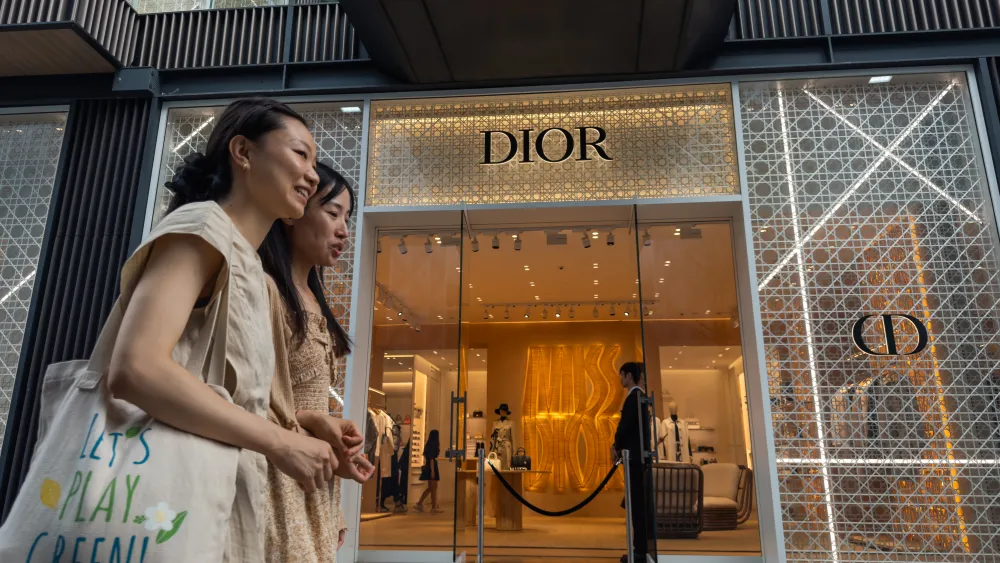

## 3) Modelisation (Entrainement et Test)

L'objectif de cette phase est de sélectionner et d'entraîner des algorithmes d'apprentissage automatique pour répondre à la problématique centrale : 

### Rappel de la problématique 

*Comment modéliser et prédire efficacement les prix des produits Dior de
Chine, et quels sont les facteurs déterminants qui influencent le pricing dans le secteur du luxe ?*

### Séparation et Préparation
Avant l'entraînement, la totalité du jeu de données est divisée en deux sous-ensembles :

Jeu d'Entraînement (Training Set) : Utilisé pour apprendre les relations entre les caractéristiques (les features) et le prix.

Jeu de Test (Test Set) : Réservé et non utilisé durant l'apprentissage. Il sert uniquement à évaluer la capacité du modèle à généraliser sur des données qu'il n'a jamais vues, simulant ainsi une prédiction sur de nouveaux produits.

### Process 
On va partir sur une approche graduelle : Si un modèle est trop simple on migre vers un autre, et ainsi de suite. On va se limiter à 3 modèles et en citer d'autre pour faire une ouverture.

In [ ]:
# Import
import sys
import os

sys.path.append(os.path.abspath("../src"))
from preprocessing import preprocess_dior,choose_encoder, verify_encod
from load_data import load_dior

# chargement du dataset
df = load_dior()

C:\Users\poowd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = preprocess_dior(df)

# X -> title + categories
# y -> price et price_eur

In [4]:
X.head()

,category1_code,category2_code,category3_code
0,WOMEN,SMALL LEATHER GOODS,MINI BAGS
1,WOMEN,SMALL LEATHER GOODS,POUCHES
2,WOMEN,MAISON,DECORATIVE PIECES
3,WOMEN,HANDBAGS,HANDBAGS
4,TIMEPIECES,EXCEPTIONAL TIMEPIECES,DIOR GRANDBAL


### Encodage et transformation

In [7]:
print(X['category1_code'].unique())

['WOMEN' 'TIMEPIECES' 'MEN' 'JEWELLERY' 'BABY DIOR']


In [8]:
print(X['category2_code'].unique())



['SMALL LEATHER GOODS' 'MAISON' 'HANDBAGS' 'EXCEPTIONAL TIMEPIECES'
 'ACCESSORIES' 'CLOTHING' 'LEATHER GOODS' 'JEWELLERY' 'JEWELS' 'GIRLS'
 'TIMEPIECES' 'BOYS' 'SHOES' 'BABY GIRLS' 'BABY BOYS' 'NEWBORN']


In [9]:
print(X['category3_code'].unique())

['MINI BAGS' 'POUCHES' 'DECORATIVE PIECES' 'HANDBAGS' 'DIOR GRANDBAL'
 'SQUARES 70X70 CM' 'JACKETS' 'SUITS' 'WALLETS' 'EARRINGS' 'NECKLACES'
 'GLASSES' 'RINGS' 'BACKPACKS' 'TIES' 'ACCESSORIES' 'SHOES' 'PLATES'
 'BELTS' 'TEA' 'COATS' 'SKIRTS' 'DRESSES' 'CUTLERY' 'CARAFES' 'TRAYS'
 'KNITWEAR' 'SWEATERS' 'GEM DIOR' 'SWEATSHIRTS' 'BRACELETS' 'SNEAKERS'
 'LA D DE DIOR' 'GLOVES' 'CARD-HOLDERS' 'SUIT JACKETS' 'MITZAH ABCDIOR'
 'DIOR GRAND SOIR' 'MITZAH' 'SQUARES 90X90 CM' 'FLAT SHOES' 'PHONES CASES'
 'PUMPS' 'PET ACCESSORIES' 'BELT BAGS' 'SHOULDER BAGS' 'SHIRTS'
 'SUNGLASSES' 'MICRO BAGS' 'T-SHIRTS' 'TABLE LINEN' 'SANDALS' 'SHAWLS'
 'SCARVES' 'TOTES' 'BADGES' 'DINNER JACKETS' 'READY-TO-WEAR' 'SCARFS'
 'ANKLE BOOTS' 'TROUSERS' 'BROOCHES AND ACCESSORIES' 'SETS'
 'SHOULDER STRAP' 'DIOR GRAND BAL' 'CLIP EARRINGS' 'BOW TIES'
 'POLO SHIRTS' 'STOLES' 'CUSHIONS' 'PURSE' 'BROOCHES' 'BASEBALL CAP'
 'JUMPERS' 'JEANS' 'UMBRELLAS' 'BATH LINEN' 'BOOTIES' 'HATS' 'OBJECTS'
 'BASKETS' 'CANDLES' 'LOAFERS' 'SHO

In [ ]:
encoding_config = {
    "category1_code": "onehot",
    "category2_code": "onehot",
    "category3_code": "",
}

X_encoded, encoders = choose_encoder(X, encoding_config, target=y["price"])

In [ ]:
print(X_encoded.columns)

In [ ]:
cols = ["category1_code", "category2_code", "category3_code"]

verify_encod(X, X_encoded, cols)

**Choix du modèle : Régression linéaire**
Pour prédire le prix des produits Dior China, nous avons choisi la régression linéaire. Ce modèle est simple et interprétable, ce qui permet de mesurer l’influence de chaque variable sur le prix. La cible (prix) est continue et, après transformation logarithmique et standardisation, sa distribution est adaptée à une modélisation linéaire. De plus, certaines relations entre les caractéristiques (niveau de luxe, type de produit) et le prix semblent globalement linéaires, rendant la régression linéaire appropriée avant d’explorer des modèles plus complexes.

\begin{equation}
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
\end{equation}

où :
- $\hat{y}$ : valeur prédite par le modèle  
- $x_1, x_2, \dots, x_p$ : variables/features  
- $\beta_1, \beta_2, \dots, \beta_p$ : coefficients appris par le modèle  
- $\beta_0$ : intercept (ordonnée à l'origine)
